In [1]:
import numpy as np 
import pandas as pd 
import os
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import random
import tensorflow_hub as hub

In [2]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.applications import InceptionV3


# from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Input, GlobalAveragePooling2D
from keras import backend as K
from keras import applications
from keras.utils import plot_model


import keras_tuner as kt

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

from tqdm.auto import tqdm
import shutil as sh

import matplotlib.pyplot as plt
from IPython.display import Image, clear_output
%matplotlib inline

import os
import shutil
from xml.etree import ElementTree as ET
import cv2
import xml.etree.ElementTree as ET
from PIL import Image
import glob

print('Tensorflow version:', tf.__version__)

Tensorflow version: 2.13.0


c:\Users\juank\AppData\Local\Programs\Python\Python38\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
curr_path = os.getcwd()
img_train_path = os.path.join(curr_path,'images','train')
img_val_path = os.path.join(curr_path,'images','val')
img_test_path = os.path.join(curr_path,'images','test')

label_train_path = os.path.join(curr_path,'labels','train')
label_val_path = os.path.join(curr_path,'labels','val')
label_test_path = os.path.join(curr_path,'labels','test')

In [4]:
curr_path = os.getcwd()
# label_path = os.path.join(curr_path, 'labs')
data_path = ''
img_path = curr_path+'/images'
label_path = curr_path+'/labels'

In [5]:
faceList = os.listdir(img_path)
faceList[:3]

['test', 'train', 'val']

In [6]:
dataSize = len(faceList)
dataSize

715

In [7]:
trainSplit = 0.7
valSplit = 0.1
testSplit = 0.2

imgTrainList = faceList[:int(dataSize*trainSplit)]
imgValList = faceList[int(dataSize*trainSplit):int(dataSize*(trainSplit+valSplit))]
imgTestList = faceList[int(dataSize*(trainSplit+valSplit)):]
len(imgTrainList), len(imgValList), len(imgTestList)

(500, 72, 143)

In [8]:
imgTrainList = os.listdir(img_train_path)
imgValList = os.listdir(img_val_path)
imgTestList = os.listdir(img_test_path)
len(imgTrainList), len(imgValList), len(imgTestList)

(497, 72, 143)

In [9]:
def_size = 300
space = ' '
new_line = '\n'
text = '.txt'
class_id = 0

def change_extension(file):
    basename=os.path.splitext(file)[0]
    filename=basename+text
    return filename

labelTrainList = list(map(change_extension, imgTrainList))
labelValList = list(map(change_extension, imgValList))
labelTestList = list(map(change_extension, imgTestList))
len(labelTrainList), len(labelValList), len(labelTestList)

(497, 72, 143)

In [10]:
imgTrainList[45], labelTrainList[45]

('video_11min_046.jpg', 'video_11min_046.txt')

In [11]:
imgTestList[23], labelTestList[23]

('video_11min_593.jpg', 'video_11min_593.txt')

In [12]:
imgValList[44], labelValList[44] 

('video_11min_542.jpg', 'video_11min_542.txt')

In [13]:
def_size = 300
space = ' '
new_line = '\n'
text = '.txt'
class_id = 0

In [14]:
config_path=os.path.join(curr_path, 'config.yaml')
config_path

'c:\\Users\\juank\\Desktop\\NoDigasMamadas\\config.yaml'

c:\Users\juank\Desktop\NoDigasMamadas\images\train c:\Users\juank\Desktop\NoDigasMamadas\labels\train
c:\Users\juank\Desktop\NoDigasMamadas\labels\train\video_11min_386.txt
c:\Users\juank\Desktop\NoDigasMamadas\images\train c:\Users\juank\Desktop\NoDigasMamadas\labels\train
c:\Users\juank\Desktop\NoDigasMamadas\labels\train\video_11min_386.txt
c:\Users\juank\Desktop\NoDigasMamadas\images\train c:\Users\juank\Desktop\NoDigasMamadas\labels\train
c:\Users\juank\Desktop\NoDigasMamadas\labels\train\video_11min_074.txt
c:\Users\juank\Desktop\NoDigasMamadas\images\train c:\Users\juank\Desktop\NoDigasMamadas\labels\train
c:\Users\juank\Desktop\NoDigasMamadas\labels\train\video_11min_148.txt


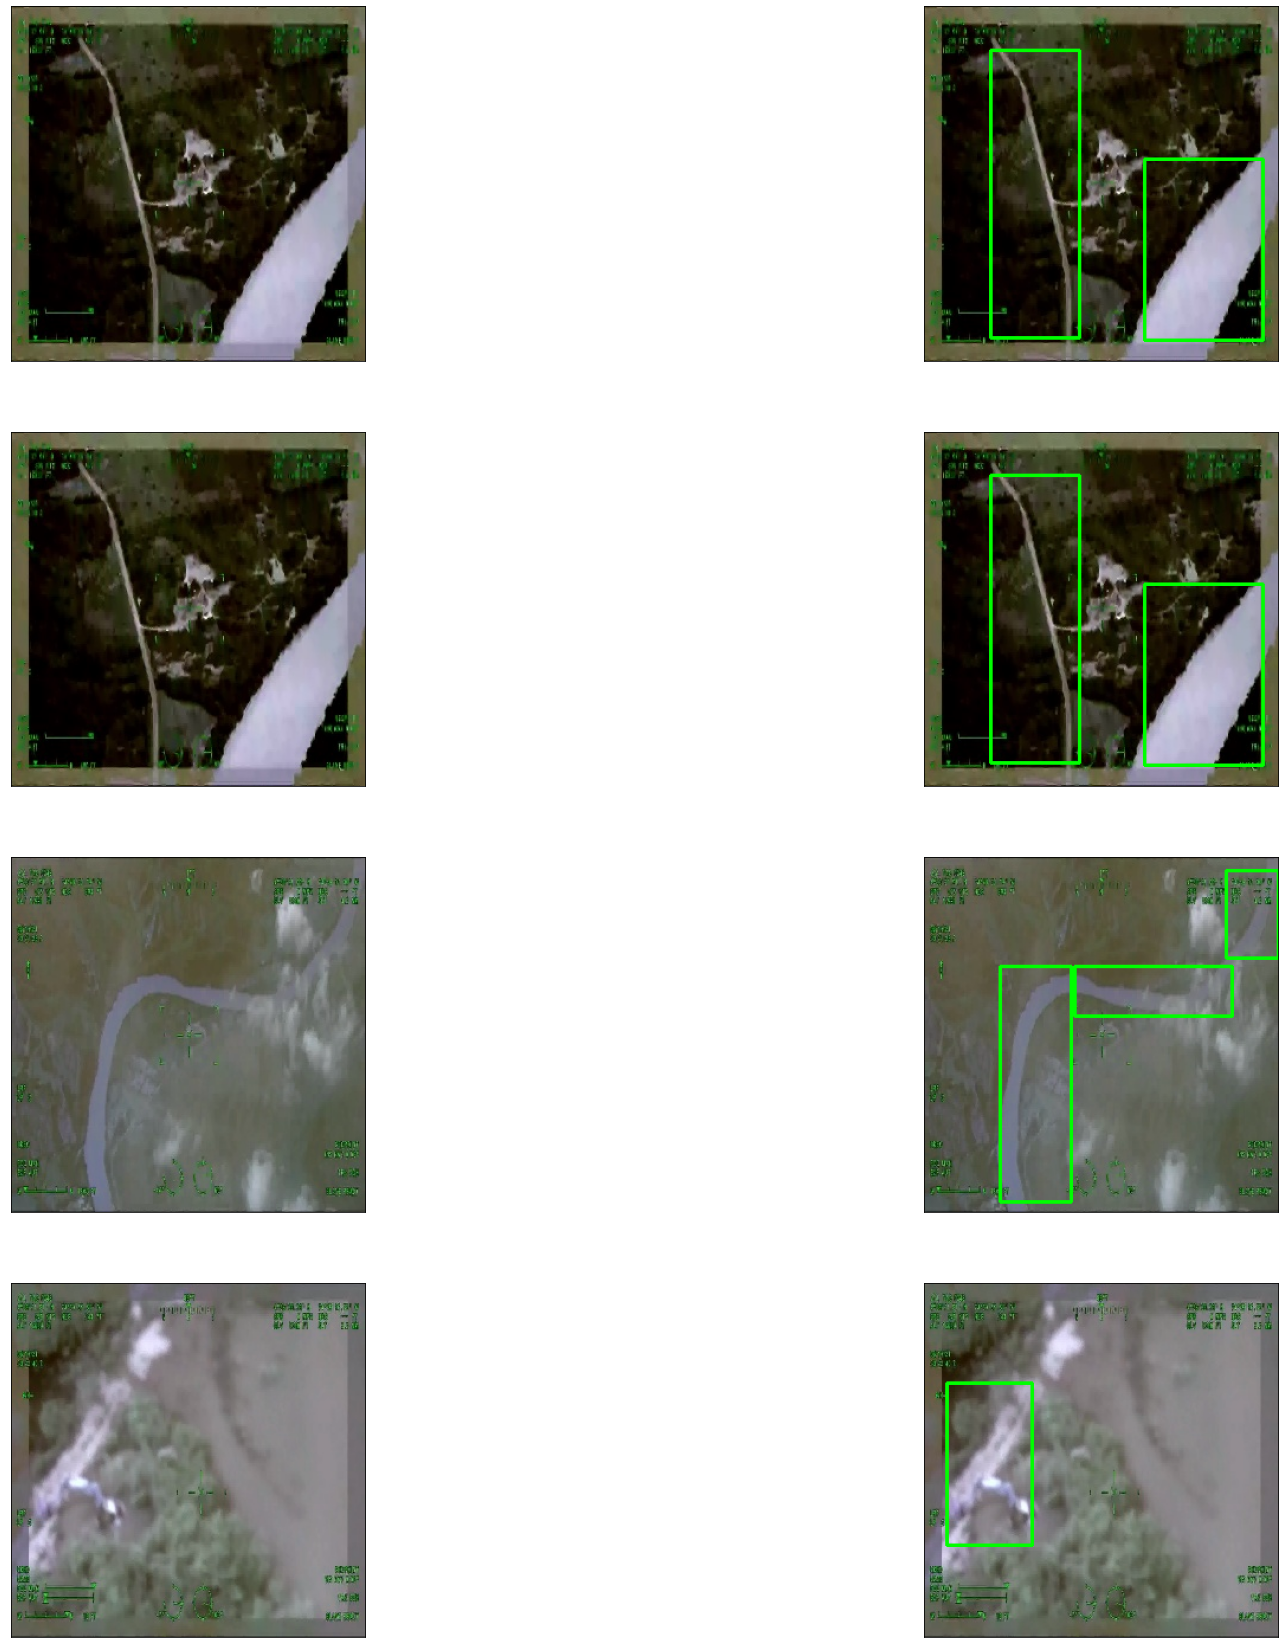

In [15]:
import copy
green = (0,255,0)
def get_bbox_from_label(text_file_path):
    bbox_list=[]
    print(text_file_path)
    with open(text_file_path, "r") as file:
        
        for line in file:
            _,x_centre,y_centre,width,height=line.strip().split(" ")
            x1=(float(x_centre)+(float(width)/2))*def_size
            x0=(float(x_centre)-(float(width)/2))*def_size
            y1=(float(y_centre)+(float(height)/2))*def_size
            y0=(float(y_centre)-(float(height)/2))*def_size

            vertices=np.array([[int(x0), int(y0)], [int(x1), int(y0)],
                               [int(x1),int(y1)], [int(x0),int(y1)]])
#             vertices=vertices.reshape((-1,1,2))
            bbox_list.append(vertices)

    return tuple(bbox_list)

plt.figure(figsize=(30,30))
for i in range(1,8,2):
    k = random.randint(0, len(imgTrainList)-1)
    img_path = os.path.join(img_train_path, imgTrainList[k])
    label_path = os.path.join(label_train_path, labelTrainList[k])
    print(img_train_path,label_train_path)
    bbox = get_bbox_from_label(label_path)
    img = cv2.imread(img_path)
    copy_img = copy.deepcopy(img)
    ax=plt.subplot(4, 2, i)
    plt.imshow(img) # displaying image
    plt.xticks([])
    plt.yticks([])
    cv2.drawContours(copy_img, bbox, -1, green, 2)
    ax=plt.subplot(4, 2, i+1)
    plt.imshow(copy_img) # displaying image with bounding box
    plt.xticks([])
    plt.yticks([])

In [16]:
#Documentation -> https://www.kaggle.com/models/google/mobilenet-v2
m = tf.keras.Sequential([
    hub.KerasLayer("https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/035-128-classification/2",
                   trainable = False)
])

In [17]:
m.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
import yaml
with open('config2.yaml', 'r') as file:
    config = yaml.safe_load(file)

In [16]:
train_path = config['train']
train_labels_path = config['train_labels']
val_path = config['val']
test_path = config['test']
num_classes = config['nc']
class_names = config['names']

In [39]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32

In [40]:
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(224, 224),  # adjust the target size as needed
        batch_size=batch_size,
        class_mode='categorical')

# Flow validation images in batches using the data generators
validation_generator = val_datagen.flow_from_directory(
        val_path,
        target_size=(224, 224),  # adjust the target size as needed
        batch_size=batch_size,
        class_mode='categorical')

Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


In [42]:
results=m.fit(train_path, validation_data=val_path, epochs=10)

IndexError: tuple index out of range

In [1]:
results=m.train_on_batch(train_path, validation_data=val_path, epochs=10)

NameError: name 'm' is not defined

# possible implementation
- https://flash10042.medium.com/efficientdet-with-tensorflow-3c5f9df872a2

In [5]:
class BiFPN(tf.keras.layers.Layer):
    """Bidirectional Feature Pyramid Network."""

    def __init__(self,
                 channels=64,
                 depth=3,
                 kernel_size=3,
                 depth_multiplier=1,
                 pooling_strategy='avg',
                 name='BiFPN'):
        super().__init__(name=name)
        """Initialize BiFPN.
        Args:
            channels: an integer representing number of units inside each fusing node
                and convolution layer.
            depth: an integer representing number of BiFPN layers. depth > 0.
            kernel_size: an integer or tuple/list of 2 integers, specifying 
                the height and width of the 2D convolution window.
            depth_multiplier: an integer representing depth multiplier for
                separable convolution layers in BiFPN nodes.
            pooling_strategy: a string representing pooling strategy in BiFPN layers.
                'avg' or 'max'. Otherwise the max pooling will be selected.
            name: a string representing layer name.
        """
        self.depth = depth
        self.channels = channels
        self.pooling_strategy = pooling_strategy

        self.convs_1x1 = [tf.keras.layers.Conv2D(channels,
                                                 1,
                                                 padding='same',
                                                 name=f'1x1_conv_level_{3+i}') for i in range(5)]

        self.bns = [
            tf.keras.layers.BatchNormalization(name=f'bn_level_{i}') for i in range(5)
        ]
        self.act = tf.keras.layers.Activation(tf.nn.silu)

        self.bifpn_layers = [BiFPNLayer(channels=channels,
                                        kernel_size=kernel_size,
                                        depth_multiplier=depth_multiplier,
                                        pooling_strategy=pooling_strategy,
                                        name=f'BiFPN_Layer_{i}') for i in range(depth)]

    def call(self, inputs, training=False):
        assert len(inputs) == 5

        squeezed = [self.convs_1x1[i](inputs[i]) for i in range(5)]
        normalized = [self.bns[i](squeezed[i], training=training) for i in range(5)]
        activated = [self.act(normalized[i]) for i in range(5)]
        feature_maps = self.bifpn_layers[0](activated, training=training)
        for layer in self.bifpn_layers[1:]:
            feature_maps = layer(feature_maps, training=training)

        return feature_maps

In [17]:
import torch
import torchvision
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.rpn import AnchorGenerator
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
from torchvision.datasets import CocoDetection
from torch.optim import SGD
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

In [18]:
os.path.exists(train_labels_path)

True

In [19]:
print(len(train_labels_path))

50


In [20]:
print(len(train_path))

50


In [35]:
import json

def parse_yolo_label(label_file_path, image_width, image_height):
    annotations = []
    with open(label_file_path, 'r') as f:
        for line in f:
            class_id, center_x, center_y, width, height = map(float, line.split())
            abs_center_x = int(center_x * image_width)
            abs_center_y = int(center_y * image_height)
            abs_width = int(width * image_width)
            abs_height = int(height * image_height)
            x1 = max(abs_center_x - abs_width // 2, 0)
            y1 = max(abs_center_y - abs_height // 2, 0)
            x2 = min(abs_center_x + abs_width // 2, image_width)
            y2 = min(abs_center_y + abs_height // 2, image_height)
            annotations.append({
                "bbox": [x1, y1, x2 - x1, y2 - y1],
                "category_id": int(class_id)
            })
    return annotations

# Path to the directory containing YOLO-style label files
label_directory = "labels/train"
# Path to the directory containing corresponding images
image_directory = "images/train"
# Output file path for COCO annotations
coco_output_file = "coco_format_annotations.json"

# Get a list of YOLO label files
label_files = [f for f in os.listdir(label_directory) if f.endswith('.txt')]

# Create COCO dataset format dictionary
coco_data = {
    "info": {},
    "licenses": [],
    "images": [],
    "annotations": [],
    "categories": [{"id": i, "name": str(i)} for i in range(1, len(label_files) + 1)]
}

# Parse YOLO labels and convert to COCO format
image_id = 1
annotation_id = 1
for label_file in label_files:
    image_filename = os.path.splitext(label_file)[0] + '.jpg'
    image_path = os.path.join(image_directory, image_filename)
    image = Image.open(image_path)
    image_width, image_height = image.size
    coco_data["images"].append({
        "id": image_id,
        "width": image_width,
        "height": image_height,
        "file_name": image_filename
    })
    annotations = parse_yolo_label(os.path.join(label_directory, label_file), image_width, image_height)
    for annotation in annotations:
        annotation["id"] = annotation_id
        annotation["image_id"] = image_id
        coco_data["annotations"].append(annotation)
        annotation_id += 1
    image_id += 1

# Save COCO dataset format to JSON file
with open(coco_output_file, 'w') as f:
    json.dump(coco_data, f)

In [36]:
transform = transforms.Compose([
    transforms.ToTensor()
])

train_data_path = train_path
train_label_file = train_labels_path

train_dataset = CocoDetection(root=train_path, annFile='coco_format_annotations.json', transform=transform)

train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True, num_workers=4)

backbone = torchvision.models.mobilenet_v2(pretrained=True).features
backbone.out_channels = 1280  # Set the number of output channels
anchor_generator = AnchorGenerator(sizes=((32, 64, 128, 256, 512),),
                                   aspect_ratios=((0.5, 1.0, 2.0),))
roi_pooler = torchvision.ops.MultiScaleRoIAlign(featmap_names=[0],
                                                output_size=7,
                                                sampling_ratio=2)
model = FasterRCNN(backbone,
                   num_classes=91,  # COCO dataset has 91 classes
                   rpn_anchor_generator=anchor_generator,
                   box_roi_pool=roi_pooler)

# Optionally, modify the model's head
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes=91)

# Define the optimizer and learning rate scheduler
params = [p for p in model.parameters() if p.requires_grad]
optimizer = SGD(params, lr=0.005, momentum=0.9, weight_decay=0.0005)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

# Train the model
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for images, targets in train_loader:
        images = list(image for image in images)
        targets = [{k: v for k, v in t.items()} for t in targets]
        loss_dict = model(images, targets)
        losses = sum(loss for loss in loss_dict.values())

        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

    # Update the learning rate
    lr_scheduler.step()
    
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {losses}")

# Save the trained model
torch.save(model.state_dict(), 'faster_rcnn_model.pth')

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


c:\Users\juank\AppData\Local\Programs\Python\Python38\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\juank\AppData\Local\Programs\Python\Python38\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to C:\Users\juank/.cache\torch\hub\checkpoints\mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 23.2MB/s]


RuntimeError: Caught RuntimeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "c:\Users\juank\AppData\Local\Programs\Python\Python38\lib\site-packages\torch\utils\data\_utils\worker.py", line 308, in _worker_loop
    data = fetcher.fetch(index)
  File "c:\Users\juank\AppData\Local\Programs\Python\Python38\lib\site-packages\torch\utils\data\_utils\fetch.py", line 54, in fetch
    return self.collate_fn(data)
  File "c:\Users\juank\AppData\Local\Programs\Python\Python38\lib\site-packages\torch\utils\data\_utils\collate.py", line 277, in default_collate
    return collate(batch, collate_fn_map=default_collate_fn_map)
  File "c:\Users\juank\AppData\Local\Programs\Python\Python38\lib\site-packages\torch\utils\data\_utils\collate.py", line 144, in collate
    return [collate(samples, collate_fn_map=collate_fn_map) for samples in transposed]  # Backwards compatibility.
  File "c:\Users\juank\AppData\Local\Programs\Python\Python38\lib\site-packages\torch\utils\data\_utils\collate.py", line 144, in <listcomp>
    return [collate(samples, collate_fn_map=collate_fn_map) for samples in transposed]  # Backwards compatibility.
  File "c:\Users\juank\AppData\Local\Programs\Python\Python38\lib\site-packages\torch\utils\data\_utils\collate.py", line 140, in collate
    raise RuntimeError('each element in list of batch should be of equal size')
RuntimeError: each element in list of batch should be of equal size
